<a href="https://colab.research.google.com/github/joseph-tech-dev/machine-learning/blob/main/Spam_ham_emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)
  print("\nHere is the head of the dataframe:")
  display(df.head())

Saving spam_ham_dataset.csv to spam_ham_dataset.csv
User uploaded file "spam_ham_dataset.csv" with length 5502589 bytes

Here is the head of the dataframe:


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
df.text.iloc[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

## Summary:

### Data Analysis Key Findings
* The text data was cleaned by removing punctuation, converting to lowercase, removing stop words, and lemmatizing.
* TF-IDF was used to convert the cleaned text into numerical features.
* The data was split into training and testing sets with a test size of 25%.
* A K-Nearest Neighbors (KNN) classifier with 5 neighbors was trained on the training data.
* The trained KNN model achieved an accuracy of 0.9644 on the testing data.
* The confusion matrix and classification report indicated strong performance for both classes (0 and 1) with high precision, recall, and F1-scores.

### Insights or Next Steps
* The current KNN model shows promising performance, but further optimization of hyperparameters (like the number of neighbors for KNN or trying different kernels for SVM) could potentially improve the accuracy.
* Exploring other classification algorithms, such as Naive Bayes, Support Vector Machines (SVM), or even neural networks, could provide better performance or insights into the data.

## Visualization: Confusion Matrix Heatmap

### Subtask:
Visualize the confusion matrix using a heatmap.

**Reasoning**:
Generate a heatmap using the confusion matrix calculated during model evaluation to visualize the true vs. predicted labels.

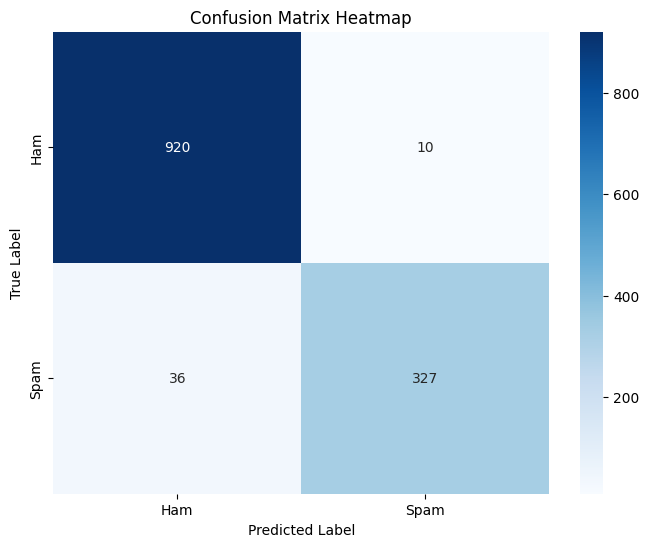

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Task
Create an email classifier model using the provided CSV file.

## Text preprocessing

### Subtask:
Clean and prepare the text data by removing unnecessary characters, converting text to lowercase, and tokenizing the text.


**Reasoning**:
I need to define a function to clean the text data in the 'text' column. This involves removing punctuation, converting to lowercase, removing stopwords, and lemmatizing. I also need to download the necessary NLTK data for stopwords and the WordNet lemmatizer. After defining the function, I will apply it to the 'text' column and store the result in a new column.



In [6]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stopwords_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords_set]
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

df['cleaned_text'] = df['text'].apply(clean_text)
display(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,cleaned_text
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop window office cheap main tre...
4,Subject: re : indian springs\r\nthis deal is t...,subject indian spring deal book teco pvr reven...


## Feature extraction

### Subtask:
Convert the text data into numerical features that can be used to train a model. I'll use TF-IDF for this.


**Reasoning**:
Instantiate a TfidfVectorizer and transform the cleaned text data into a TF-IDF matrix.



In [7]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the TF-IDF matrix as features and the 'label_num' column as the target.



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label_num'], test_size=0.25, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (3878, 47934)
Shape of X_test: (1293, 47934)
Shape of y_train: (3878,)
Shape of y_test: (1293,)


## Model training

### Subtask:
Train a classification model on the training data. I will use a K-Nearest Neighbors (KNN) classifier.


**Reasoning**:
Instantiate and train a KNN classifier using the training data.



In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Model evaluation

### Subtask:
Evaluate the performance of the trained model on the testing data.


**Reasoning**:
Make predictions using the trained KNN model on the test data and evaluate the model's performance by calculating accuracy, generating a confusion matrix, and printing a classification report.



In [13]:
y_pred = knn_model.predict(X_test)

accuracy = (accuracy_score(y_test, y_pred)) * 100
print(f"Accuracy: {accuracy:.4f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 96.4424%

Confusion Matrix:
[[920  10]
 [ 36 327]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       930
           1       0.97      0.90      0.93       363

    accuracy                           0.96      1293
   macro avg       0.97      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



## Summary:

### Data Analysis Key Findings
*   The text data was cleaned by removing punctuation, converting to lowercase, removing stop words, and lemmatizing.
*   TF-IDF was used to convert the cleaned text into numerical features.
*   The data was split into training and testing sets with a test size of 25%.
*   A K-Nearest Neighbors (KNN) classifier with 5 neighbors was trained on the training data.
*   The trained KNN model achieved an accuracy of 0.9644 on the testing data.
*   The confusion matrix and classification report indicated strong performance for both classes (0 and 1) with high precision, recall, and F1-scores.

### Insights or Next Steps
*   The current KNN model shows promising performance, but further optimization of hyperparameters (like the number of neighbors for KNN or trying different kernels for SVM) could potentially improve the accuracy.
*   Exploring other classification algorithms, such as Naive Bayes, Support Vector Machines (SVM), or even neural networks, could provide better performance or insights into the data.
